# ICP #
This notebook is all about ICP and it's different implementations. It should be visual and self - descriptive.

## Contents:
* [Overview](#Overview)
* [ICP based on SVD](#ICP-based-on-SVD) (Omitted for this recitation)
* [Non linear Least squares based ICP](#Non-linear-Least-squares-based-ICP)
* [Using point to plane metric with Least Squares ICP](#Using-point-to-plane-metric-with-Least-Squares-ICP) (Omitted for this recitation)
* [Dealing with outliers](#Dealing-with-outliers) (Partly omitted for this recitation)

## Overview
Having two scans $P = \{p_i\}$ and $Q = \{q_i\}$ we want to find a transformation (rotation $R$ and translation $t$) to apply to $P$ to match $Q$ as good as possible. In the remainder of this notebook we will try to define what does "as good as possible mean" as well as ways to find such a transformation.

Reference: https://github.com/niosus/notebooks/blob/master/icp.ipynb

## We iteratively apply the two step:

<div>
<img src="icp.png" width="500" align="left"/>
</div>

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from math import sin, cos, atan2, pi
from IPython.display import display, Math, Latex, Markdown, HTML

### The way we will plot the data

In [2]:
def plot_data(data_1, data_2, label_1, label_2, markersize_1=8, markersize_2=8):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.axis('equal')
    if data_1 is not None:
        x_p, y_p = data_1
        ax.plot(x_p, y_p, color='#336699', markersize=markersize_1, marker='o', linestyle=":", label=label_1)
    if data_2 is not None:
        x_q, y_q = data_2
        ax.plot(x_q, y_q, color='orangered', markersize=markersize_2, marker='o', linestyle=":", label=label_2)
    ax.legend()
    return ax

def plot_values(values, label):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)
    ax.plot(values, label=label)
    ax.legend()
    ax.grid(True)
    plt.show()

def animate_results(P_values, Q, corresp_values, xlim, ylim):
    """A function used to animate the iterative processes we use."""
    fig = plt.figure(figsize=(10, 6))
    anim_ax = fig.add_subplot(111)
    anim_ax.set(xlim=xlim, ylim=ylim)
    anim_ax.set_aspect('equal')
    plt.close()
    x_q, y_q = Q
    # draw initial correspondeces
    corresp_lines = []
    for i, j in correspondences:
        corresp_lines.append(anim_ax.plot([], [], 'grey')[0])
    # Prepare Q data.
    Q_line, = anim_ax.plot(x_q, y_q, 'o', color='orangered')
    # prepare empty line for moved data
    P_line, = anim_ax.plot([], [], 'o', color='#336699')

    def animate(i):
        P_inc = P_values[i]
        x_p, y_p = P_inc
        P_line.set_data(x_p, y_p)
        draw_inc_corresp(P_inc, Q, corresp_values[i])
        return (P_line,)

    def draw_inc_corresp(points_from, points_to, correspondences):
        for corr_idx, (i, j) in enumerate(correspondences):
            x = [points_from[0, i], points_to[0, j]]
            y = [points_from[1, i], points_to[1, j]]
            corresp_lines[corr_idx].set_data(x, y)

    anim = animation.FuncAnimation(fig, animate,
                                   frames=len(P_values),
                                   interval=500,
                                   blit=True)
    return HTML(anim.to_jshtml())

### Generate example data
Thoughout this notebook we will be working with generated data that looks like this:

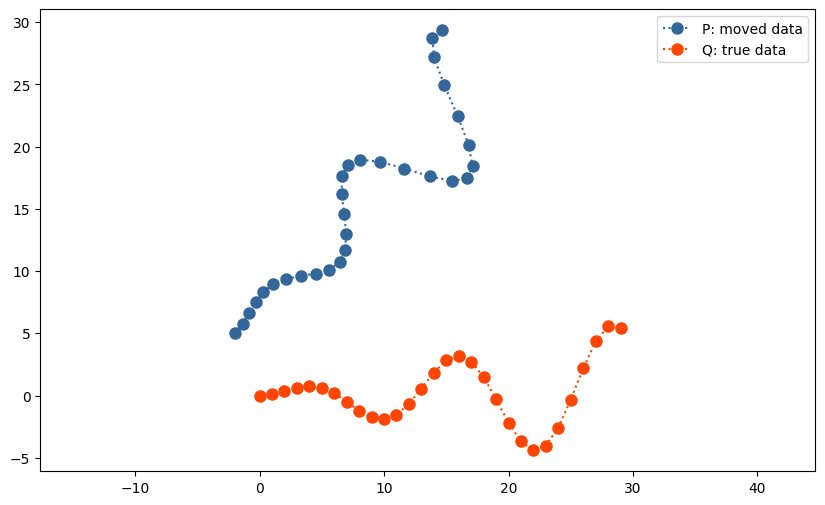

In [3]:
# initialize pertrubation rotation
angle = pi / 4
R_true = np.array([[cos(angle), -sin(angle)],
                   [sin(angle),  cos(angle)]])
t_true = np.array([[-2], [5]])

# Generate data as a list of 2d points
num_points = 30
true_data = np.zeros((2, num_points))
true_data[0, :] = range(0, num_points)
true_data[1, :] = 0.2 * true_data[0, :] * np.sin(0.5 * true_data[0, :])
# Move the data
moved_data = R_true.dot(true_data) + t_true

# Assign to variables we use in formulas.
Q = true_data
P = moved_data

plot_data(moved_data, true_data, "P: moved data", "Q: true data")
plt.show()

### Correspondences computation
We compute correspondences from $P$ to $Q$, i.e. for every $p_i$ we search the closest $q_j$ to it.

In [4]:
def get_correspondence_indices(P, Q):
    """For each point in P find closest one in Q."""
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    for i in range(p_size):
        p_point = P[:, i]
        min_dist = sys.maxsize
        chosen_idx = -1
        for j in range(q_size):
            q_point = Q[:, j]
            dist = np.linalg.norm(q_point - p_point)
            if dist < min_dist:
                min_dist = dist
                chosen_idx = j
        correspondences.append((i, chosen_idx))
    return correspondences

def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j in correspondences:
        x = [P[0, i], Q[0, j]]
        y = [P[1, i], Q[1, j]]
        if not label_added:
            ax.plot(x, y, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, color='grey')
    ax.legend()

## ICP based on SVD

Omitted for this recitation

$\newcommand{\b}[1]{\boldsymbol{\mathrm{#1}}}$
$\newcommand{\R}{\boldsymbol{\mathrm{R}}}$
$\newcommand{\x}{\boldsymbol{\mathrm{x}}}$
$\newcommand{\h}{\boldsymbol{\mathrm{h}}}$
$\newcommand{\p}{\boldsymbol{\mathrm{p}}}$
$\newcommand{\q}{\boldsymbol{\mathrm{q}}}$
$\newcommand{\t}{\boldsymbol{\mathrm{t}}}$
$\newcommand{\J}{\boldsymbol{\mathrm{J}}}$
$\newcommand{\H}{\boldsymbol{\mathrm{H}}}$
$\newcommand{\E}{\boldsymbol{\mathrm{E}}}$
$\newcommand{\e}{\boldsymbol{\mathrm{e}}}$
$\newcommand{\n}{\boldsymbol{\mathrm{n}}}$
$\DeclareMathOperator*{\argmin}{arg\,min}$
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$
# Non-linear Least-squares based ICP #
We can alternatively treat every iteration of ICP as a least squares minimization problem. The function we want to minimize is the squared sum of distances between the points of the scans:

\begin{equation}
E = \sum_i[\R\p_i + \t - \q_i]^2 \rightarrow \mathrm{min}
\end{equation}

To minimize this function we update the pose $\b{R}$, $\b{t}$ (or alternatively represented as a vector $\b{x} = [x, y, \theta]^T$) to which we need to move scan $P$ to overlap it with a query scan $Q$. It is a non-linear function because of the rotation.

## Correspondeces ##
We look for correspondeces **without** moving the data to ensure zero-mean. Therefore the correspondences look worse than in SVD case, where we first ensured that both scans are zero-mean.

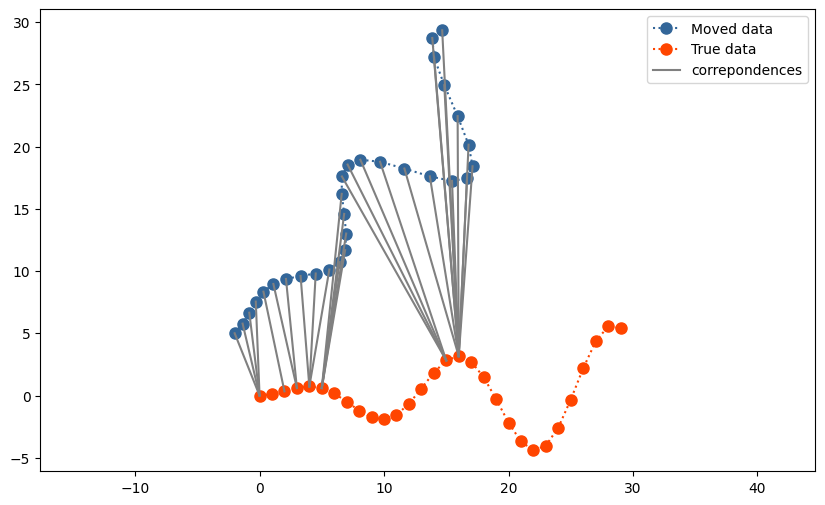

In [5]:
correspondences = get_correspondence_indices(P, Q)
ax = plot_data(P, Q, "Moved data", "True data")
draw_correspondeces(P, Q, correspondences, ax)
plt.show()

## Minimization ##
We define $\p_i \in P$ to be points we want to match against $\q_j \in Q$. By "matching" we mean finding pose $\b{x} = [x, y, \theta]^T$ that minimizes the sum of squared lengths of the correspondences. Pose $\x$ can alternatively be resresented by a rotation matrix $\R =
\begin{bmatrix}
    \cos\theta & - \sin\theta \\
    \sin\theta & \cos\theta
\end{bmatrix}$ and a translation vector $\t = [x, y]^T$. We will keep using these representations interchangibly throughtout these notes.

We will further use the following notation: $\h_i(\x) = \R_\theta \p_i + \t$ to denote the points from scan $P$ transformed with $\R$ and $\t$. Additionally, we define error function $\e$ to be:

\begin{eqnarray}
\e(\x) &=& \sum_{\{i,j\}\in C}{\e_{i,j}(\x)},\\
\e_{i,j}(\x) &=& \h_i(\x) - \q_j = \R_\theta \p_i + \t - \q_j
\end{eqnarray}


This allows us to formulate the minimization problem as follows:

\begin{eqnarray}
\b{x}_{query}
&=& \argmin_{\x}\{\E(\x)\} \\
&=& \argmin_{\x}\{\sum_{\{i, j\} \in C}{\norm{\e_{i,j}(\x)}^2}\} \\
&=& \argmin_{\x}\{\sum_{\{i, j\} \in C}{\norm{\b{h}_i(\x) - \q_j}^2}\}
\end{eqnarray}

### Gauss Newton Method ###
We will be using Gauss Newton method for computing the least squares solution of our non-linear problem. We therefore linearize our function in the vicinity of $\x$. Solving non-linear least squares is equivalent to solving the following system of equations:

\begin{equation}
\H \Delta \x = - \E^\prime(\x),
\end{equation}

where $\Delta \x$ is the increment of the argument ($[\Delta x, \Delta y, \Delta \theta]$ in our case), $\H$ is the Hessian of $\E$ and $\E^\prime(\x)$ is the derivative over the function we are trying to minimize.
We compute the gradient $\E^\prime(\x)$ as follows:

\begin{equation}
\E^\prime(\x) = \J(\x) \e(\x)
\end{equation}

In Gauss-Newton method we linearize the function around the considered point, which allows us to compute the Hessian as simple as: $\H = \J(\x)^T \J(\x)$

#### Jacobian ####
Both the Hessian and the gradient require the computation of a Jacobian. To compute a Jacobian we need a derivative of a rotation matrix:

\begin{equation}
\R_\theta^\prime
=\frac{\partial}{\partial \theta}
  \begin{bmatrix}
    \cos\theta & - \sin\theta \\
    \sin\theta & \cos\theta
  \end{bmatrix}
=\begin{bmatrix}
    -\sin\theta & - \cos\theta \\
    \cos\theta & -\sin\theta
  \end{bmatrix}
\end{equation}

In [6]:
def dR(theta):
    return np.array([[-sin(theta), -cos(theta)],
                     [cos(theta),  -sin(theta)]])

def R(theta):
    return np.array([[cos(theta), -sin(theta)],
                     [sin(theta),  cos(theta)]])

Now we have everything to compute the Jacobian $\b{J}$ as follows:

\begin{eqnarray}
\b{J} = \frac{\partial \e_{i,j}(\x)}{\partial \x} = \frac{\partial \h_i(\x)}{\partial \x}
&=& \Big(\frac{\partial \h_i(\x)}{\partial x}, \frac{\partial \h_i(\x)}{\partial y}, \frac{\partial \h_i(\x)}{\partial \theta}\Big) \\
&=&\Big(\b{I}, \R_\theta^\prime \p_i \Big) \\
&=&
\begin{bmatrix}
    1 & 0 & -\sin\theta\ p_i^x - \cos\theta\ p_i^y \\
    0 & 1 & \cos\theta\ p_i^x - \sin\theta\ p_i^y
\end{bmatrix}
\end{eqnarray}

In [15]:
def jacobian(x, p_point):
    theta = x[2]
    J = np.zeros((2, 3))
    J[0:2, 0:2] = np.identity(2)
    J[0:2, [2]] = dR(theta).dot(p_point)
    return J

def error(x, p_point, q_point):
    rotation = R(x[2])
    translation = x[0:2]
    prediction = rotation.dot(p_point) + translation
    return prediction - q_point

## Solving the Least Squares problem
Now that we know how to compute the Jacobian, we can compute the system of equations, solving which delivers the solution to our problem. We initialize Hessian $\H$ and gradient $\b{g}$ by zeros:

\begin{equation}
\b{H} =
\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 0
\end{bmatrix}, \
\b{g} =
\begin{bmatrix}
    0 \\
    0 \\
    0
\end{bmatrix} \
\end{equation}

We now need to construct a system of equations solving which would give us the relative pose. **For every corresponding pair of points** do the following:

\begin{eqnarray}
\H &\rightarrow& \b{H} + \J^T \J \\
\b{g} &\rightarrow& \b{g} + \J^T \e
\end{eqnarray}

Now that the system of equation is ready, we can find the $\Delta\b{x}$ - the solution to the least squares problem:

\begin{equation}
\H \Delta\x = -\b{g} \Longrightarrow \Delta\x = -\b{H}^{-1}\b{g}
\end{equation}

This can be solved without actually inverting the matrix in reality.

<ipython-input-6-72d69cc16f45>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.array([[cos(theta), -sin(theta)],
<ipython-input-6-72d69cc16f45>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [sin(theta),  cos(theta)]])
<ipython-input-6-72d69cc16f45>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.array([[-sin(theta), -cos(theta)],
<ipython-input-6-72d69cc16f45>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprec

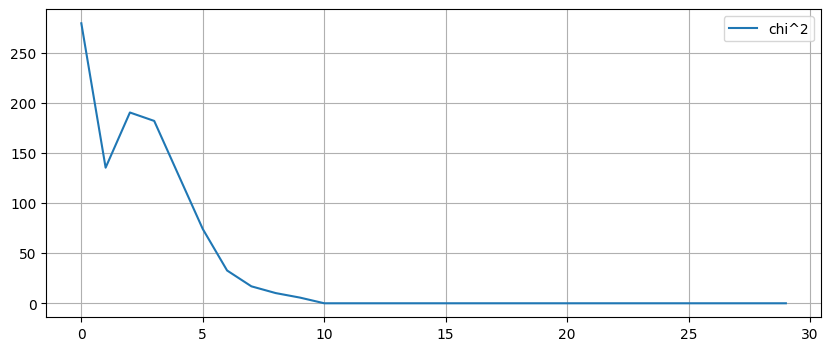

[279.8595127207585, 135.53670591984243, 190.6852979447412, 182.26474858502053, 128.164107674186, 74.19198054773416, 32.75621055136215, 16.937417697402456, 10.195621925274697, 5.668046943437885, 2.425741340758006e-09, 4.338734978715565e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29, 4.4965071597597673e-29]


In [16]:
def prepare_system(x, P, Q, correspondences, kernel=lambda distance: 1.0):
    H = np.zeros((3, 3))
    g = np.zeros((3, 1))
    chi = 0
    for i, j in correspondences:
        p_point = P[:, [i]]
        q_point = Q[:, [j]]
        e = error(x, p_point, q_point)
        weight = kernel(e) # Please ignore this weight until you reach the end of the notebook.
        J = jacobian(x, p_point)
        H += weight * J.T.dot(J)
        g += weight * J.T.dot(e)
        chi += e.T * e
    return H, g, chi

def icp_least_squares(P, Q, iterations=30, kernel=lambda distance: 1.0):
    x = np.zeros((3, 1))
    chi_values = []
    x_values = [x.copy()]  # Initial value for transformation.
    P_values = [P.copy()]
    P_copy = P.copy()
    corresp_values = []
    for i in range(iterations):
        rot = R(x[2])
        t = x[0:2]
        correspondences = get_correspondence_indices(P_copy, Q)
        corresp_values.append(correspondences)
        H, g, chi = prepare_system(x, P, Q, correspondences, kernel)
        dx = np.linalg.lstsq(H, -g, rcond=None)[0]
        x += dx
        x[2] = atan2(sin(x[2]), cos(x[2])) # normalize angle
        chi_values.append(chi.item(0))
        x_values.append(x.copy())
        rot = R(x[2])
        t = x[0:2]
        P_copy = rot.dot(P.copy()) + t
        P_values.append(P_copy)
    corresp_values.append(corresp_values[-1])
    return P_values, chi_values, corresp_values

P_values, chi_values, corresp_values = icp_least_squares(P, Q)
plot_values(chi_values, label="chi^2")
print(chi_values)

### Animate the result

In [17]:
animate_results(P_values, Q, corresp_values, xlim=(-10, 35), ylim=(-10, 30))

# Using point to plane metric with Least Squares ICP
Omitted for this recitation

# Dealing with outliers
If we corrupt our data, it gets harder for all of these algorithms to reason about it.

Let's say, there is a couple pretty bad outliers in the $P$ data:

In [18]:
# Introduce an outlier.
P_outliers = P.copy()
P_outliers[:, 10] = np.array([-10, 30])
P_outliers[:, 20] = np.array([0, 40])

In [19]:
center_of_P_outliers = np.array([P_outliers.mean(axis=1)]).T
center_of_Q = np.array([Q.mean(axis=1)]).T
P_centered_outliers = P_outliers - center_of_P_outliers
Q_centered = Q - center_of_Q

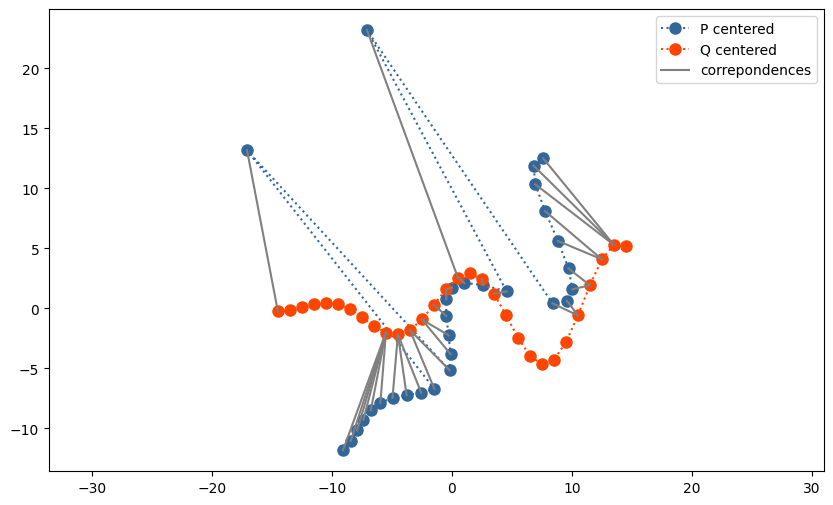

In [20]:
correspondences = get_correspondence_indices(P_centered_outliers, Q_centered)
ax = plot_data(P_centered_outliers, Q_centered,
               label_1='P centered',
               label_2='Q centered')
draw_correspondeces(P_centered_outliers, Q_centered, correspondences, ax)
plt.show()

## We cannot just run our methods without modification
If we try to run any of the methods above without modification, they will fail as the outliers will "drag" the solution away from the one that looks visually the best. That is because the outliers generate quite a big error that becomes part of the optimization process, which tries to satisfy these new constraints.

#### Let's see what will happen if we just use the vanilla point-to-point ICP

<ipython-input-6-72d69cc16f45>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.array([[cos(theta), -sin(theta)],
<ipython-input-6-72d69cc16f45>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [sin(theta),  cos(theta)]])
<ipython-input-6-72d69cc16f45>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.array([[-sin(theta), -cos(theta)],
<ipython-input-6-72d69cc16f45>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprec

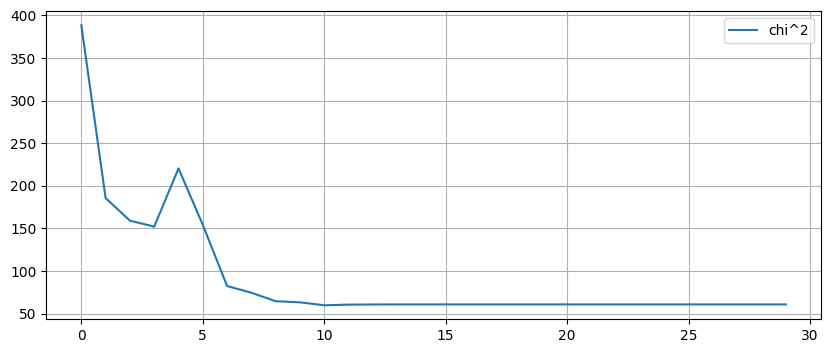

In [21]:
P_values, chi_values, corresp_values = icp_least_squares(P_outliers, Q)
plot_values(chi_values, label="chi^2")
animate_results(P_values, Q, corresp_values, xlim=(-5, 35), ylim=(-10, 30))

### The non-robust version fails without an adaptation

## Robust kernels to give outliers less weight
There is a notion of "robust kernels" that are usually used for dealing with outliers. The idea is simple: we want to reduce the influence of the data that we deem "bad" on the final solution. There is a lot of different kernels that one might use and looking at all of them is beyong the scope of this notebook.

#### Let's see them in practice
In this example, I will use an extremely simple kernel (not the best in general, but quite good for the sake of example). The kernel takes in the value of an error and returns a weight of $1$ if the error is below threshold and $0$ if it is above. Basically, it is a way of saying "I don't care about anything that is way too far away". Usually a less strict version of the kernel is used, but the idea is similar.

<ipython-input-6-72d69cc16f45>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.array([[cos(theta), -sin(theta)],
<ipython-input-6-72d69cc16f45>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [sin(theta),  cos(theta)]])
<ipython-input-6-72d69cc16f45>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.array([[-sin(theta), -cos(theta)],
<ipython-input-6-72d69cc16f45>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprec

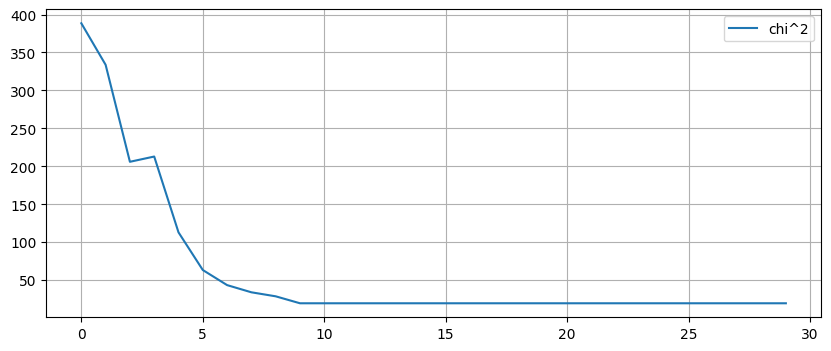

In [22]:
from functools import partial
def kernel(threshold, error):
    if np.linalg.norm(error) < threshold:
        return 1.0
    return 0.0

P_values, chi_values, corresp_values = icp_least_squares(
    P_outliers, Q, kernel=partial(kernel, 10))
plot_values(chi_values, label="chi^2")
animate_results(P_values, Q, corresp_values, xlim=(-5, 35), ylim=(-10, 30))

## Yay!
We can see that our trick has worked! The kernel downweighted the outliers and while they still have a correspondence, because they generate way too big of an error we disregard them in the optimization.

## Can we remove outliers using ICP based on SVD?
Omitted for this recitation